In [5]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import os
import numpy as np
import powerlaw
import math

## read dataset function

In [75]:
def load_flle(filename):
    x = []
    with open(filename) as f:
        line = f.readline()
        line = line.strip('\n')
    return line

def dirlist(path, files):
    filelist = os.listdir(path)

    for filename in filelist:
        filepath = os.path.join(path, filename)
        if os.path.isdir(filepath):
            dirlist(filepath, files)
        else:
            files.append(filepath)
    return files

def load_train_files(path):
    x = []
    y = []
    list = os.listdir(path)
    for i in range(0, len(list)):
        path2 = os.path.join(path, list[i])
        if os.path.isfile(path2):
            x.append(load_flle(path2))
            y.append(0)
    return x, y


def load_attack_files(path, x, y, attack_type):
    # return x:length of each attack file
    total = 0
    for i in range(1,11): 
        # each attack has 10 folder 
        files = dirlist(path + attack_type +"_" + str(i), [])
        total = total + len(files)
        for file in files:
            x.append(load_flle(file))
            y.append(1)
    print(attack_type + " data: " + str(total))
    return x, y

def get_increasing_array(length):
    arr = np.zeros(length)
    for i in range(length):
        arr[i] = i
    return arr

def calculate_attack_syscall_avg(atk_type):
    x_orig = []
    x_extend = []
    y_orig = []
    y_extend = []

    x_orig, y_orig = load_attack_files("ADFA-LD/Attack_Data_Master/", x_orig, y_orig, atk_type)
    fileIndex = 0 # attack count
    totalLen = 0
    x_avglen = 0
    for d in x_orig:
        fileIndex+=1
        # print(fileIndex, ": ", d, "\nThe syscall length of this attack file: ", len(d.split(' '))-1,  "\n")
        totalLen += len(d.split(' ')) - 1

    x_avglen = totalLen / len(x_orig)
    print("Avg", atk_type, "system call length:", x_avglen, "\n")
    return x_avglen

## read data

In [11]:
attack_type = ['Adduser', 'Hydra_FTP', 'Hydra_SSH', 'Java_Meterpreter', 'Meterpreter', 'Web_Shell']
xa = []
ya = []
for attack in attack_type:
    xa, ya = load_attack_files("ADFA-LD/Attack_Data_Master/", xa, ya, attack) # 746
xt, yt = load_train_files("ADFA-LD/Training_Data_Master/")  # 833
xv, yv = load_train_files("ADFA-LD/Validation_Data_Master/")  # 4372

# training data
x_trn = xt + xa
y_trn = yt + ya

# validation data
x_val = xv 
y_val = yv 


Adduser data: 91
Hydra_FTP data: 162
Hydra_SSH data: 176
Java_Meterpreter data: 124
Meterpreter data: 75
Web_Shell data: 118


## Parameter

In [14]:
n = 2
left = 0
right = 10

### Normal

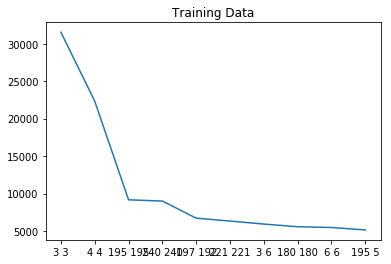

('3 3', '4 4', '195 195', '240 240', '197 192', '221 221', '3 6', '180 180', '6 6', '195 5')
(31531, 22334, 9163, 8999, 6716, 6325, 5928, 5569, 5468, 5145)


In [21]:
dic_normal = defaultdict(lambda: 0)
for d in xt:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_normal[index] = dic_normal[index] + 1

lists = sorted(dic_normal.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Training Data")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### adduser

In [76]:
"""
x_addusr_orig = []
x_addusr_extend = []
y_addusr_orig = []
y_addusr_extend = []

x_addusr_orig, y_addusr_orig = load_attack_files("ADFA-LD/Attack_Data_Master/", x_addusr_orig, y_addusr_orig, 'Adduser')
fileIndex = 0 # adduser attack count
totalLen = 0
x_addusr_avglen = 0
for d in x_addusr_orig:
    fileIndex+=1
    print(fileIndex, ": ", d, "\nThe syscall length of this attack file: ", len(d.split(' '))-1,  "\n")
    totalLen += len(d.split(' ')) - 1
    
x_addusr_avglen = totalLen / len(x_addusr_orig)
print("Avg adduser system call length:", x_addusr_avglen)
"""

calculate_attack_syscall_avg("Adduser")
calculate_attack_syscall_avg("Hydra_FTP")
calculate_attack_syscall_avg("Hydra_SSH")
calculate_attack_syscall_avg("Java_Meterpreter")
calculate_attack_syscall_avg("Meterpreter")

Adduser data: 91
Avg Adduser system call length: 460.8021978021978 

Hydra_FTP data: 162
Avg Hydra_FTP system call length: 313.1666666666667 

Hydra_SSH data: 176
Avg Hydra_SSH system call length: 411.1306818181818 

Java_Meterpreter data: 124
Avg Java_Meterpreter system call length: 479.86290322580646 

Meterpreter data: 75
Avg Meterpreter system call length: 465.82666666666665 



465.82666666666665

### adduser 2-gram

Adduser data: 91
defaultdict(<function <lambda> at 0x0000020FED163598>, {'265 168': 2597, '168 168': 5964, '168 265': 2650, '168 102': 198, '102 168': 202, '265 265': 1541, '265 102': 95, '102 265': 92, '3 104': 105, '104 91': 2, '91 265': 5, '265 142': 240, '142 142': 501, '142 104': 83, '104 3': 110, '3 175': 109, '175 3': 73, '3 142': 275, '142 146': 175, '146 142': 171, '142 175': 150, '175 142': 165, '142 265': 264, '142 119': 68, '119 119': 7, '119 3': 23, '175 175': 159, '265 175': 52, '175 119': 28, '119 142': 61, '104 142': 101, '175 104': 43, '104 265': 54, '265 146': 196, '146 3': 198, '104 104': 22, '91 146': 4, '146 175': 39, '3 146': 166, '146 146': 114, '3 91': 23, '91 175': 10, '3 3': 1113, '265 3': 1067, '146 104': 31, '3 265': 1043, '104 119': 3, '142 3': 279, '265 104': 65, '175 91': 12, '91 142': 5, '146 265': 196, '104 146': 28, '119 146': 15, '175 265': 41, '265 119': 28, '119 104': 7, '3 119': 13, '3 192': 6, '192 142': 1, '119 175': 10, '119 265': 35, '104 175':

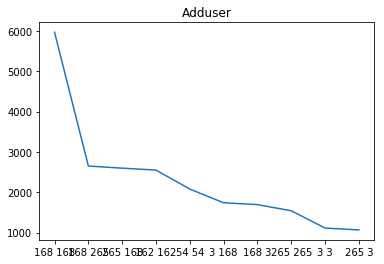

('168 168', '168 265', '265 168', '162 162', '54 54', '3 168', '168 3', '265 265', '3 3', '265 3')
(5964, 2650, 2597, 2549, 2079, 1739, 1694, 1541, 1113, 1067)


In [29]:
dic_addusr = defaultdict(lambda: 0)
x_addusr = []
y_addusr = []
x_addusr, y_addusr = load_attack_files("ADFA-LD/Attack_Data_Master/", x_addusr, y_addusr, 'Adduser')
for d in x_addusr:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        #print(index)
        dic_addusr[index] = dic_addusr[index] + 1
print(dic_addusr)

lists = sorted(dic_addusr.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Adduser")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Hydra FTP

Hydra_FTP data: 162


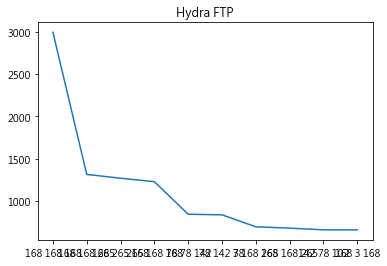

('168 168 168', '168 168 265', '168 265 168', '265 168 168', '78 78 142', '78 142 78', '3 168 168', '265 168 265', '142 78 102', '168 3 168')
(2992, 1314, 1269, 1228, 844, 837, 696, 680, 660, 659)


In [32]:
dic_ftp = defaultdict(lambda: 0)
x_ftp = []
y_ftp = []
x_ftp, y_ftp = load_attack_files("ADFA-LD/Attack_Data_Master/", x_ftp, y_ftp, 'Hydra_FTP')
for d in x_ftp:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_ftp[index] = dic_ftp[index] + 1

lists = sorted(dic_ftp.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Hydra FTP")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Hydra SSH

Hydra_SSH data: 176


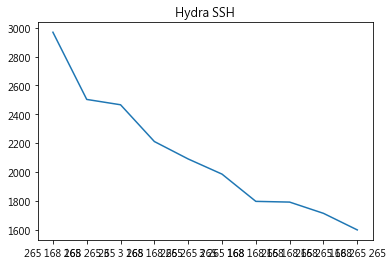

('265 168 265', '168 265 3', '265 3 265', '168 168 265', '265 265 265', '3 265 168', '168 168 168', '265 168 168', '265 265 168', '168 265 265')
(2969, 2503, 2466, 2211, 2090, 1985, 1796, 1791, 1713, 1598)


In [33]:
dic_ssh = defaultdict(lambda: 0)
x_ssh = []
y_ssh = []
x_ssh, y_ssh = load_attack_files("ADFA-LD/Attack_Data_Master/", x_ssh, y_ssh, 'Hydra_SSH')
for d in x_ssh:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_ssh[index] = dic_ssh[index] + 1

lists = sorted(dic_ssh.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Hydra SSH")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Java Meterpreter

Java_Meterpreter data: 124


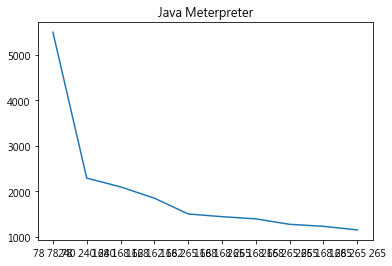

('78 78 78', '240 240 240', '168 168 168', '162 162 162', '168 265 168', '168 168 265', '265 168 168', '265 265 265', '265 168 265', '168 265 265')
(5497, 2288, 2095, 1846, 1499, 1439, 1391, 1271, 1227, 1148)


In [34]:
dic_java = defaultdict(lambda: 0)
x_java = []
y_java = []
x_java, y_java = load_attack_files("ADFA-LD/Attack_Data_Master/", x_java, y_java, 'Java_Meterpreter')
for d in x_java:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i + n])
        dic_java[index] = dic_java[index] + 1

lists = sorted(dic_java.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Java Meterpreter")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Meterpreter

Meterpreter data: 75


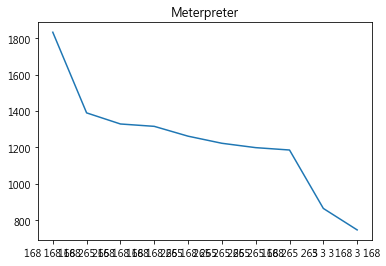

('168 168 168', '168 265 168', '265 168 168', '168 168 265', '265 168 265', '265 265 265', '265 265 168', '168 265 265', '3 3 3', '168 3 168')
(1833, 1390, 1329, 1316, 1262, 1223, 1199, 1186, 865, 747)


In [35]:
dic_met = defaultdict(lambda: 0)
x_met = []
y_met = []
x_met, y_met = load_attack_files("ADFA-LD/Attack_Data_Master/", x_met, y_met, 'Meterpreter')
for d in x_met:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_met[index] = dic_met[index] + 1

lists = sorted(dic_met.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Meterpreter")
plt.plot(px, py)
plt.show()
print(px)
print(py)


### Web Shell

Web_Shell data: 118


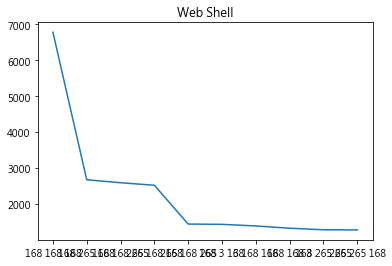

('168 168 168', '168 265 168', '168 168 265', '265 168 168', '265 168 265', '168 3 168', '3 168 168', '168 168 3', '168 265 265', '265 265 168')
(6782, 2674, 2592, 2521, 1441, 1433, 1388, 1325, 1282, 1278)


In [36]:
dic_web = defaultdict(lambda: 0)
x_web = []
y_web = []
x_web, y_web = load_attack_files("ADFA-LD/Attack_Data_Master/", x_web, y_web, 'Web_Shell')
for d in x_web:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_web[index] = dic_web[index] + 1

lists = sorted(dic_web.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Web Shell")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### 攻擊序列中 n-gram之累積數分布與power law

### n = 1 的情況 

90


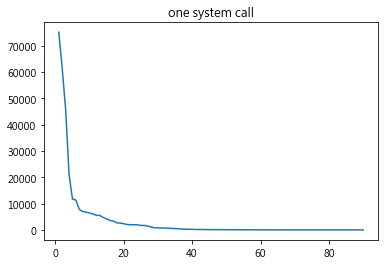

(75175, 61396, 45819, 21125, 11782, 11316, 7781, 6992, 6751, 6446, 6071, 5552, 5506, 4725, 4191, 3579, 3322, 2695, 2582, 2369, 2046, 1974, 1971, 1952, 1697, 1694, 1452, 1133, 795, 756, 750, 724, 630, 574, 519, 430, 347, 294, 254, 225, 162, 161, 157, 125, 112, 112, 103, 103, 88, 71, 68, 68, 67, 63, 62, 58, 55, 49, 47, 33, 27, 26, 18, 18, 18, 16, 16, 13, 13, 10, 7, 6, 6, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1)
alpha: 2.021106382776984
Xmin: 4191.0


Calculating best minimal value for power law fit
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substi

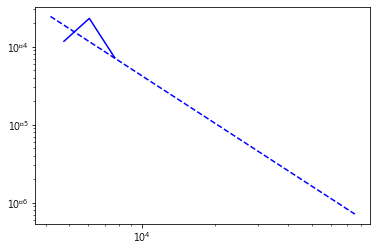

In [130]:
n = 1
dic_xa = defaultdict(lambda: 0)
for d in xa:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_xa[index] = dic_xa[index] + 1

lists = sorted(dic_xa.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) # unpack a list of pairs into two tuples
print(len(lists))
x_axis = get_increasing_array(len(lists)+1)
plt.title("one system call")
plt.plot(x_axis[1:], py)
plt.show()
#print(px)
print(py)

#for i in range(len(a_axis)):
#    a_axis[1:]
#for 
#PLNumlog[i] = math.log10(PLNum[i])
#Numlog[i] = math.log10(Num[i])

results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

### n >= 2 的情況 

7719


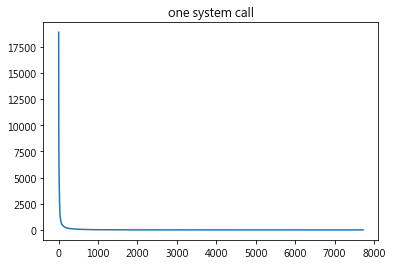

Calculating best minimal value for power law fit


alpha: 1.8843879834936998
Xmin: 99.0


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

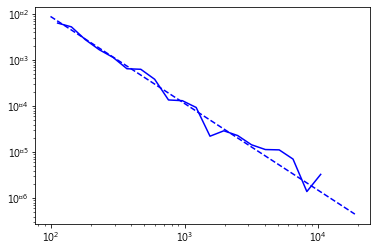

In [135]:
n = 3
dic_xa = defaultdict(lambda: 0)
for d in xa:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_xa[index] = dic_xa[index] + 1

lists = sorted(dic_xa.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) # unpack a list of pairs into two tuples
print(len(lists))
x_axis = get_increasing_array(len(lists)+1)
plt.title("one system call")
plt.plot(x_axis[1:], py)
plt.show()
#print(px)


results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

## train data中system call序列長度分佈

In [49]:
train_len = []
for i in range(len(xt)):
    train_len.append(len(xt[i]))
train_len.sort()
Y = np.array(train_len)
print(Y)

[ 300  300  300  300  300  302  302  303  304  304  305  306  306  307
  308  308  310  310  312  312  312  312  312  313  314  314  314  314
  314  315  317  318  319  319  319  320  320  320  320  320  321  321
  321  322  323  323  323  323  324  325  325  326  326  327  328  328
  329  331  331  334  334  335  335  335  336  337  337  338  339  339
  340  340  341  341  341  341  343  343  345  345  346  346  347  347
  348  348  348  349  350  351  351  351  351  351  351  351  351  351
  351  351  352  352  352  352  352  352  353  353  354  354  356  356
  358  360  366  366  366  369  369  369  369  370  370  370  370  370
  370  370  370  372  372  372  372  373  373  373  374  375  375  376
  376  376  376  376  378  378  378  378  380  380  380  381  382  383
  383  386  386  387  387  388  389  391  392  392  392  392  392  392
  393  395  395  395  395  398  398  400  401  403  404  406  406  406
  408  409  410  410  410  412  412  412  412  412  416  416  417  420
  421 

## 特定system call 組合在train data中的單序列呼叫次數分佈

In [100]:
target = [78,78]
cmd_len = len(target)
cmd_index = ' '.join([str(v) for v in target])
commend_count = []
for d in xt:
    count = 0
    data = d.strip().split(' ')
    for i in range(len(d)):
        #print(' '.join(data[i:i+n]))
        if cmd_index == ' '.join(data[i:i+cmd_len]):
            count = count + 1
    commend_count.append(count)

for d in xv:
    count = 0
    data = d.strip().split(' ')
    for i in range(len(d)):
        #print(' '.join(data[i:i+n]))
        if cmd_index == ' '.join(data[i:i+cmd_len]):
            count = count + 1
    commend_count.append(count)


3065
[0.000e+00 1.000e+00 2.000e+00 ... 3.062e+03 3.063e+03 3.064e+03]


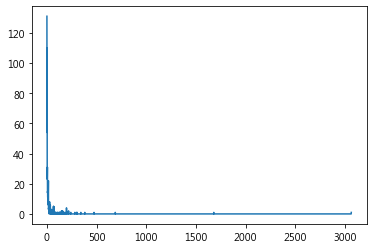

In [113]:
#print(max(commend_count))
#print(commend_count)
sta = np.zeros(max(commend_count)+1)
print(len(sta))
x_axis = np.zeros(max(commend_count)+1)
for i in range(max(commend_count)+1):
    x_axis[i] = i

for i in commend_count:
    sta[i] = sta[i] + 1
print(x_axis)
#print(len(x_axis))
#plt.plot(x_axis[1:-2500], sta[1:-2500])
plt.plot(x_axis[1:], sta[1:])
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha: 2.0045211627754993
Xmin: 1.0


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

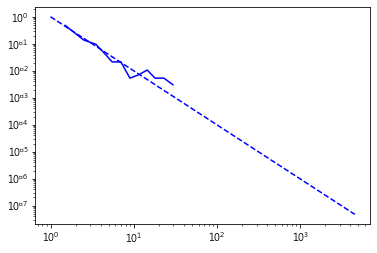

In [114]:
results = powerlaw.Fit(sta)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')